# АНАЛИЗ ДРАЙВЕРОВ УДОВЛЕТВОРЕННОСТИ КЛИЕНТОВ СЕРВИСА ДОСТАВКИ ЕДЫ

## СОДЕРЖАНИЕ

### Основные разделы
1. [Краткая информация о проекте](#Краткая-информация-о-проекте)
2. [Основные выводы](#основные-выводы)
3. [Детальный анализ по сегментам](#детальный-анализ-по-сегментам)
4. [План дальнейшего исследования](#план-дальнейшего-исследования)
5. [Ограничения исследования](#ограничения-исследования)

### Приложения
- [Приложение A: Методология](#приложение-а-методология)
- [Приложение B: Технические детали](#приложение-б-технические-детали)

---

**Навигация по документу:**
- Для быстрого ознакомления: разделы 1-2
- Для полного понимания: разделы 1-5
- Для проверки методологии: Приложения

---

## Краткая информация о проекте

### Контекст
Учебный проект по анализу данных опроса клиентов сервиса доставки еды (n=1000).

**Важно:** Это демонстрационный проект на учебных данных, взятых из открытых источников. Цель - показать владение методами количественных исследований и навыком интерпретации данных.

### Цель исследования
Определить факторы, влияющие на общую удовлетворенность клиентов, и выявить различия в драйверах удовлетворенности между сегментами пользователей.

### Ключевые результаты

**1. Интегральный индекс удовлетворенности показал слабую связь**
- Корреляция Спирмена: r=0.113, p<0.001
- Вывод: необходим сегментированный анализ

**2. Сегменты клиентов имеют разные потенциальные драйверы:**

| Сегмент | Размер | Драйверы | Корреляция |
|---------|--------|----------|------------|
| Новички | 370 (37%) | Цена | r=0.136 |
| Активные | 522 (52%) | Цена + Качество еды | r=0.247 / r=0.099 |
| Лояльные | 108 (11%) | Не выявлены | Требуется кач. исследование |

**3. Неясные драйверы удовлетворенности у категории "лояльные"**
- Традиционно замеряемые метрики не работают для лояльных клиентов
- Предложен план качественного исследования

### Методология
Корреляционный анализ Спирмена, визуальный анализ данных.


---

## Основные выводы

### 1: Интегральный индекс не является эффективной метрикой

**Что обнаружили:**
- Корреляция Спирмена между overall_satisfaction_index и satisfaction_level: r=0.113 (p<0.001)

**Интерпретация:**
- Несмотря на статистическую значимость, связь слишком слабая для практического применения
- Равные веса субиндексов (0.33 каждый) могли исказить результат - возможно, необходим регрессионный анализ для определения весов

**Вывод:**
необходим сегментированный анализ для выявления специфичных драйверов по группам клиентов.


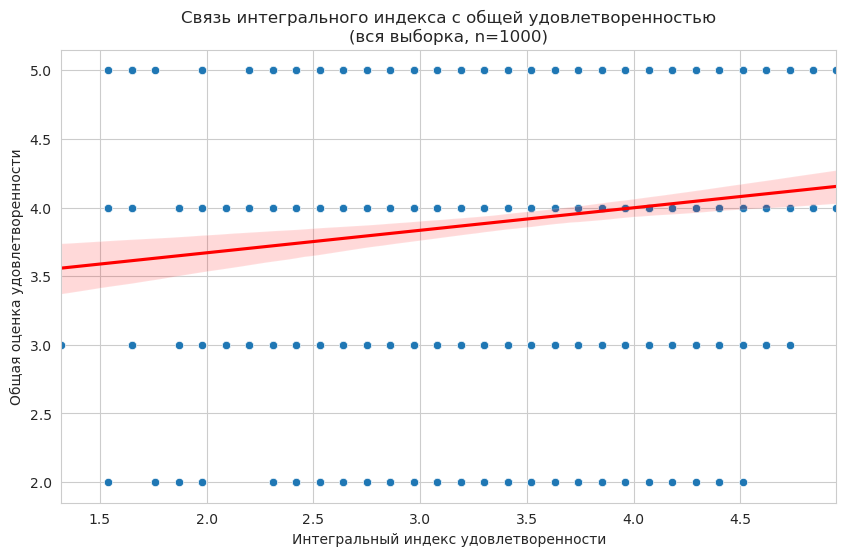

In [3]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='overall_satisfaction_index', y='satisfaction_level', data=delivery_df)

sns.regplot(x='overall_satisfaction_index', y='satisfaction_level', data=delivery_df, scatter=False, color='red')

plt.title('Связь интегрального индекса с общей удовлетворенностью\n(вся выборка, n=1000)')
plt.xlabel('Интегральный индекс удовлетворенности')
plt.ylabel('Общая оценка удовлетворенности')
plt.grid(True)
plt.show()

### 2: Разные сегменты клиентов имеют разные драйверы

**Сравнительная таблица результатов:**

| Сегмент | Размер | Драйверы | Корреляция |
|---------|--------|----------|------------|
| Новички | 370 (37%) | Цена | r=0.136 |
| Активные | 522 (52%) | Цена + Качество еды | r=0.247 / r=0.099 |
| Лояльные | 108 (11%) | Не выявлены | Требуется кач. исследование |


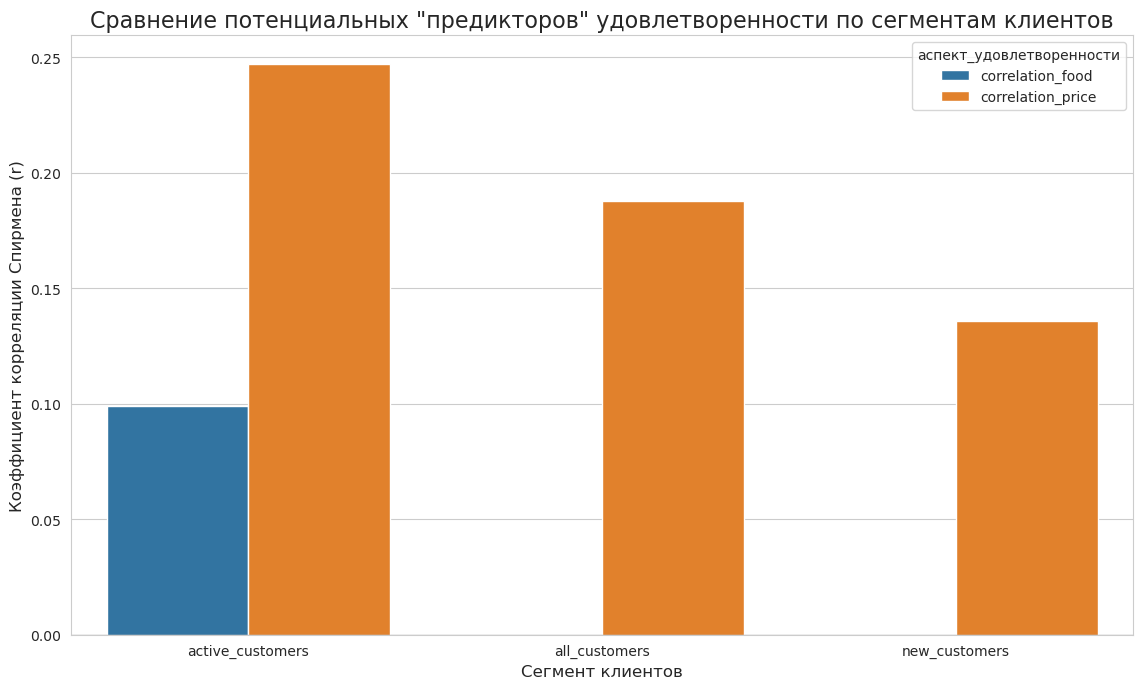

In [4]:
plt.figure(figsize=(12, 7))

sns.barplot(
    data=df_melted,
    x='client_category',     
    y='коэффициент_r',        
    hue='аспект_удовлетворенности'  
)

plt.axhline(0, color='black', linewidth=0.8)

plt.title('Сравнение потенциальных "предикторов" удовлетворенности по сегментам клиентов', fontsize=16)
plt.xlabel('Сегмент клиентов', fontsize=12)
plt.ylabel('Коэффициент корреляции Спирмена (r)', fontsize=12)

plt.tight_layout()
plt.show()

### 3: Неясные драйверы удовлетворенности у категории "лояльные"

- Традиционно замеряемые в df метрики не работают для лояльных клиентов
- Необходимо продолжить исследование с использованием качественных методов для прояснения драйверов удовлетворенности данной категории

### 4: Максимальная чувствительность к цене - у активных клиентов

**Паттерн:** активные клиенты (4-6 заказов) показывают максимальную ценовую 
чувствительность (r=0.247), что в 1.8 раза выше, чем у новичков (r=0.136), 
и становится незначимой у лояльных (r=0.086, p>0.05).

**Интерпретация:** возможно, клиент активно сравнивает цены с конкурентами и оценивает соотношение "цена-качество" - уже попробовал сервис, но ещё не выработал привычку пользоваться им регулярно. 

**Риск:** если в этот момент клиент столкнется с неоправданно высокой ценой 
или низким качеством еды, возможно, "покинет" сервис.

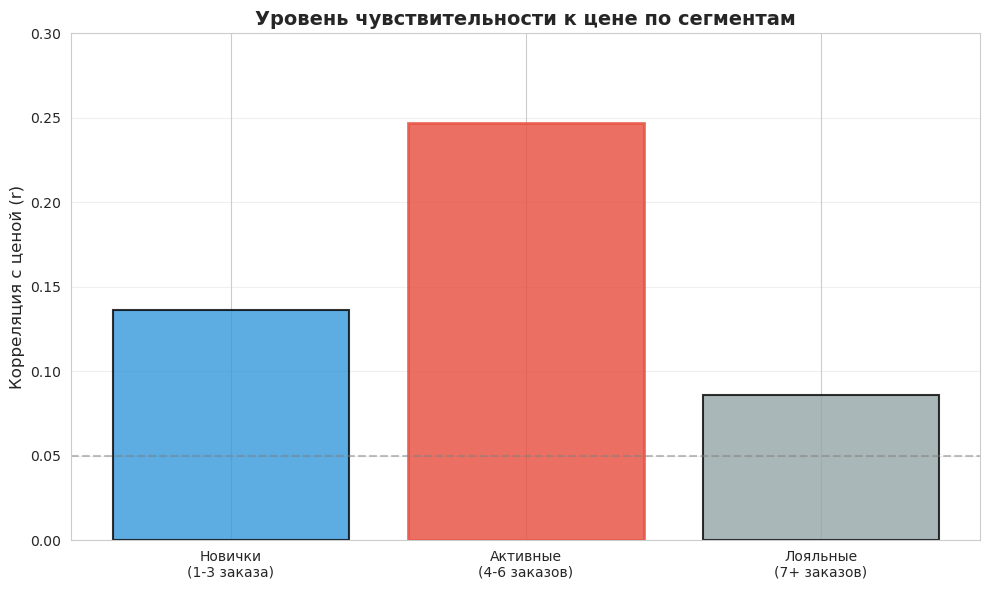

In [8]:
price_corr = [0.136, 0.247, 0.086]
segments = ['Новички\n(1-3 заказа)', 'Активные\n(4-6 заказов)', 'Лояльные\n(7+ заказов)']

plt.figure(figsize=(10, 6))
bars = plt.bar(segments, price_corr, color=['#3498db', '#e74c3c', '#95a5a6'], 
               edgecolor='black', linewidth=1.5, alpha=0.8)

bars[1].set_color('#e74c3c')
bars[1].set_linewidth(2)

plt.axhline(y=0.05, color='gray', linestyle='--', alpha=0.5, label='Порог слабой связи')
plt.ylabel('Корреляция с ценой (r)', fontsize=12)
plt.title('Уровень чувствительности к цене по сегментам', 
          fontsize=14, fontweight='bold')
plt.ylim(0, 0.3)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Практическое применение для бизнеса

**Бизнес-применение:** стратегия удержания должна концентрироваться на 4-6 заказе, 
а не на первом (чувствительность к цене ниже) или лояльных клиентах (цена не значима).

**Рекомендация: A/B тест персонализированных скидок для клиентов на 4-6 заказе.**

## Детальный анализ по сегментам

### Методологическое введение

**Выбор метода анализа:**
- Использован коэффициент корреляции Спирмена (непараметрический)
- Причина: satisfaction_level - дискретная переменная, не имеет нормального распределения, распределение overall_satisfaction_index отличается от нормального
- Подробное обоснование см. [Приложение A](#приложение-а-методология)

**Сегментация клиентов:**
- Критерий: количество заказов за период - т.к. нет иных данных для сегментации
- Новички: 1-3 заказа (n=370)
- Активные: 4-6 заказов (n=522)
- Лояльные: 7+ заказов (n=108)

### Анализ общей выборки

**Создание интегрального индекса:**

In [9]:
delivery_df['delivery_subindex'] = delivery_df[['delivery_speed_rating', 'packaging_quality_rating', 'courier_politeness_rating']].mean(axis=1)
delivery_df['price_subindex'] = delivery_df['price_satisfaction']
delivery_df['food_subindex'] = delivery_df['food_quality']

delivery_df['overall_satisfaction_index'] = (
    delivery_df['food_subindex'] * 0.33 + 
    delivery_df['delivery_subindex'] * 0.33 + 
    delivery_df['price_subindex'] * 0.33
)

**Результаты корреляционного анализа для всей выборки:**

| Переменная | Корреляция (r) | P-value | Значимость |
|------------|----------------|---------|------------|
| overall_satisfaction_index | 0.1129 | 0.0003 | Значима, слабая |
| price_subindex | 0.1876 | <0.0001 | Значима, слабая |
| food_subindex | 0.0326 | 0.3028 | Не значима |
| delivery_subindex | -0.0134 | 0.6723 | Не значима |

**Вывод:** для "среднего" клиента значимой является только связь между удовлетворенностью и ценой, но она слабая для практического применения

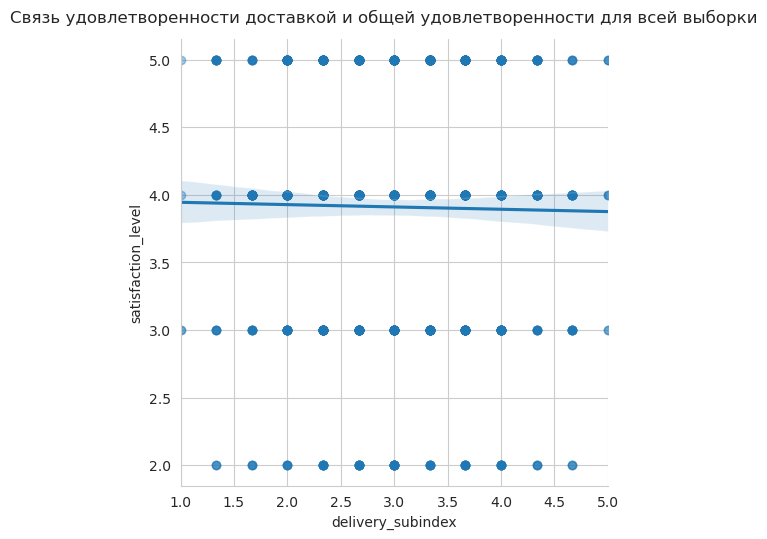

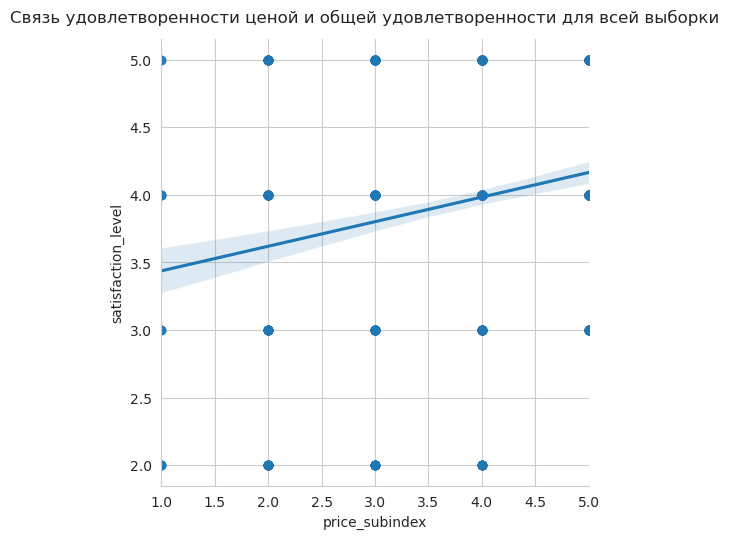

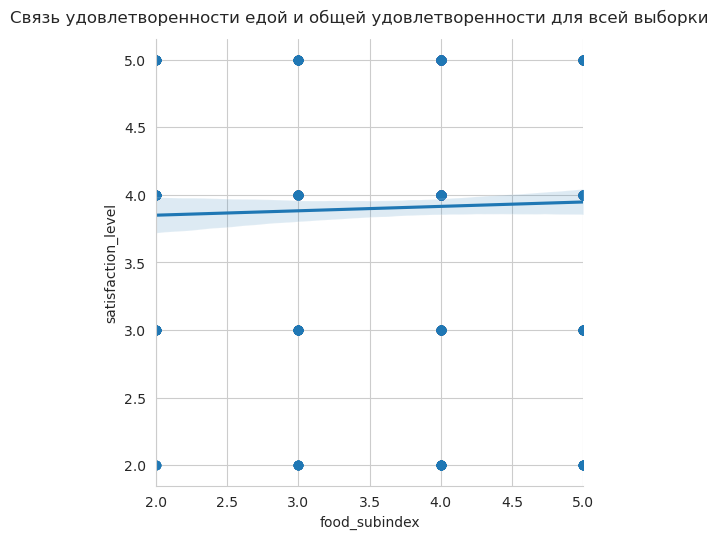

In [11]:
sns.lmplot(
    data=delivery_merged,
    x='delivery_subindex',      
    y='satisfaction_level',                
    scatter_kws={'alpha': 0.4} 
)
plt.suptitle('Связь удовлетворенности доставкой и общей удовлетворенности для всей выборки', y=1.03)
plt.show()

sns.lmplot(
    data=delivery_merged,
    x='price_subindex',      
    y='satisfaction_level',                
    scatter_kws={'alpha': 0.4} 
)
plt.suptitle('Связь удовлетворенности ценой и общей удовлетворенности для всей выборки', y=1.03)
plt.show()

sns.lmplot(
    data=delivery_merged,
    x='food_subindex',      
    y='satisfaction_level',                
    scatter_kws={'alpha': 0.4} 
)
plt.suptitle('Связь удовлетворенности едой и общей удовлетворенности для всей выборки', y=1.03)
plt.show()

### Сегмент "Новички"

**Характеристики:** 370 клиентов (37% выборки), 1-3 заказа

**Результаты анализа:**

| Переменная | Корреляция (r) | P-value | Значимость |
|------------|----------------|---------|------------|
| price_subindex | 0.1357 | 0.0090 | Значима, слабая |
| food_subindex | -0.0299 | 0.5660 | Не значима |
| delivery_subindex | -0.0624 | 0.2313 | Не значима |

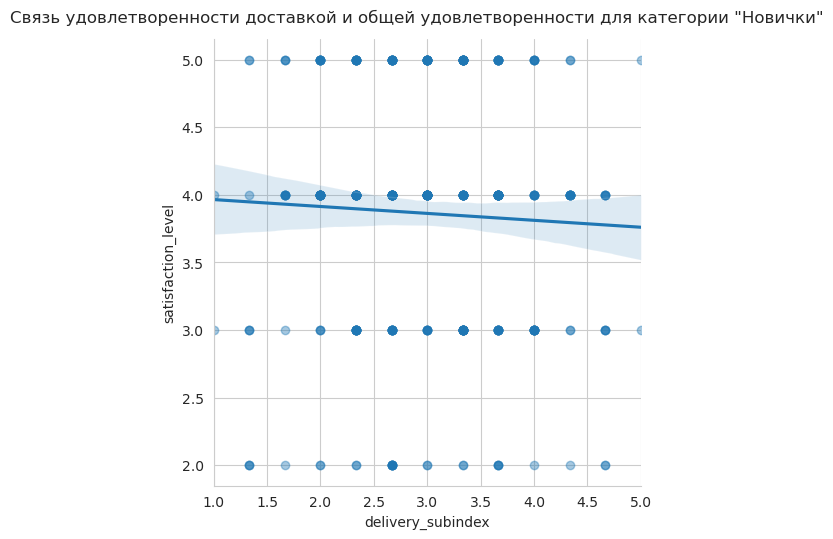

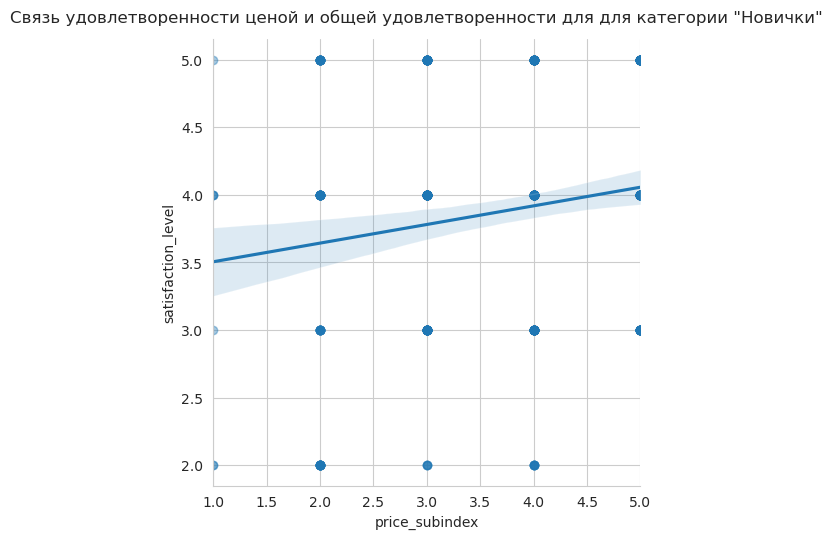

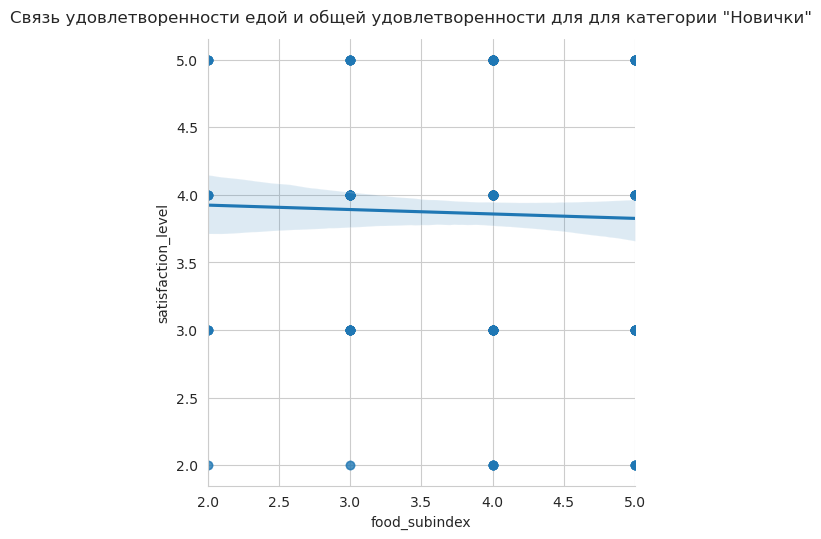

In [31]:
subset_new = delivery_merged[delivery_merged['client_category'] == 'new']

sns.lmplot(
    data=subset_new,
    x='delivery_subindex',      
    y='satisfaction_level',                
    scatter_kws={'alpha': 0.4} 
)
plt.suptitle('Связь удовлетворенности доставкой и общей удовлетворенности для категории "Новички"', y=1.03)
plt.show()

sns.lmplot(
    data=subset_new,
    x='price_subindex',      
    y='satisfaction_level',                
    scatter_kws={'alpha': 0.4} 
)
plt.suptitle('Связь удовлетворенности ценой и общей удовлетворенности для для категории "Новички"', y=1.03)
plt.show()

sns.lmplot(
    data=subset_new,
    x='food_subindex',      
    y='satisfaction_level',                
    scatter_kws={'alpha': 0.4} 
)
plt.suptitle('Связь удовлетворенности едой и общей удовлетворенности для для категории "Новички"', y=1.03)
plt.show()

**Интерпретация:**

- Цена является слабым, но единственным значимым драйвером (r=0.136, p<0.01)
- Качество еды и доставки не влияют на удовлетворенность
- Возможная причина: недостаточно данных для оценки других аспектов
- Практическая рекомендация: промо-акции для новых пользователей могут повысить удовлетворенность


### Сегмент "Активные"

**Характеристики сегмента:** 522 клиента (52% выборки), 4-6 заказов

**Результаты анализа:**

| Переменная | Корреляция (r) | P-value | Значимость |
|------------|----------------|---------|------------|
| price_subindex | 0.2471 | <0.0001 | Значима, слабая |
| food_subindex | 0.0989 | 0.0239 | Значима, слабая |
| delivery_subindex | 0.0083 | 0.8499 | Не значима |

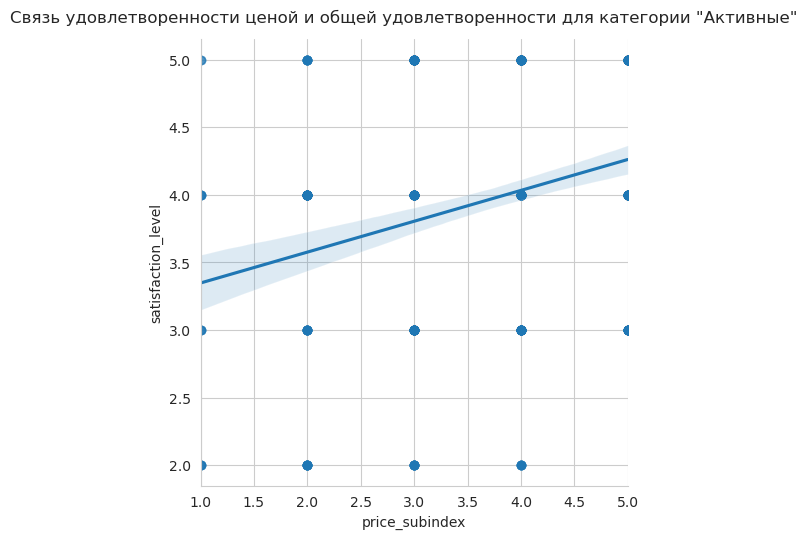

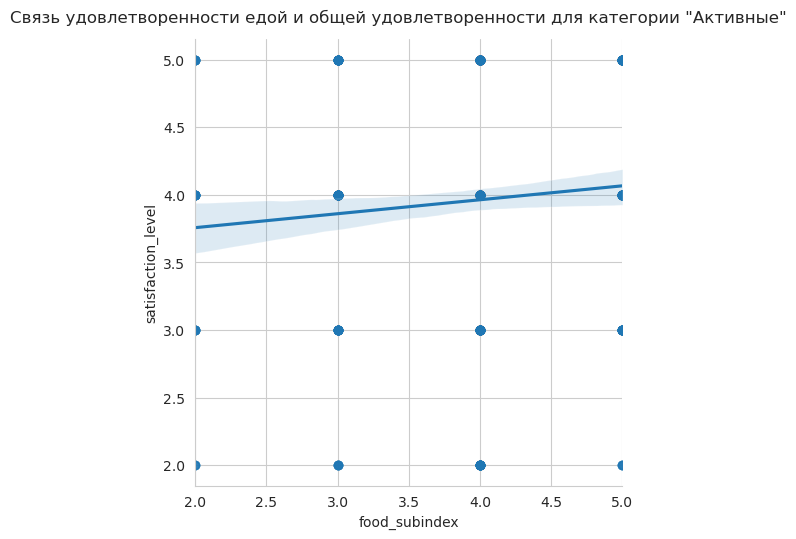

In [12]:
subset_active = delivery_merged[delivery_merged['client_category'] == 'active']

sns.lmplot(
    data=subset_active,
    x='price_subindex',      
    y='satisfaction_level',                
    scatter_kws={'alpha': 0.4} 
)
plt.suptitle('Связь удовлетворенности ценой и общей удовлетворенности для категории "Активные"', y=1.03)
plt.show()

sns.lmplot(
    data=subset_active,
    x='food_subindex',      
    y='satisfaction_level',                
    scatter_kws={'alpha': 0.4} 
)
plt.suptitle('Связь удовлетворенности едой и общей удовлетворенности для категории "Активные"', y=1.03)
plt.show()

**Интерпретация:**
    
- Наиболее чувствительный к цене сегмент (r=0.247, p<0.001)
- Появляется чувствительность к качеству еды (r=0.099, p<0.05)
- Возможно, клиенты начинают оценивать соотношение цена/качество
- Возможно - критический сегмент для удержания: здесь принимается решение о продолжении использования сервиса


### Сегмент "Лояльные"

**Характеристики сегмента:** 108 клиентов (11% выборки), 7+ заказов

**Результаты анализа:**

| Переменная | Корреляция (r) | P-value | Значимость |
|------------|----------------|---------|------------|
| price_subindex | 0.0860 | 0.3763 | Не значима |
| food_subindex | -0.0501 | 0.6064 | Не значима |
| delivery_subindex | 0.0440 | 0.6512 | Не значима |

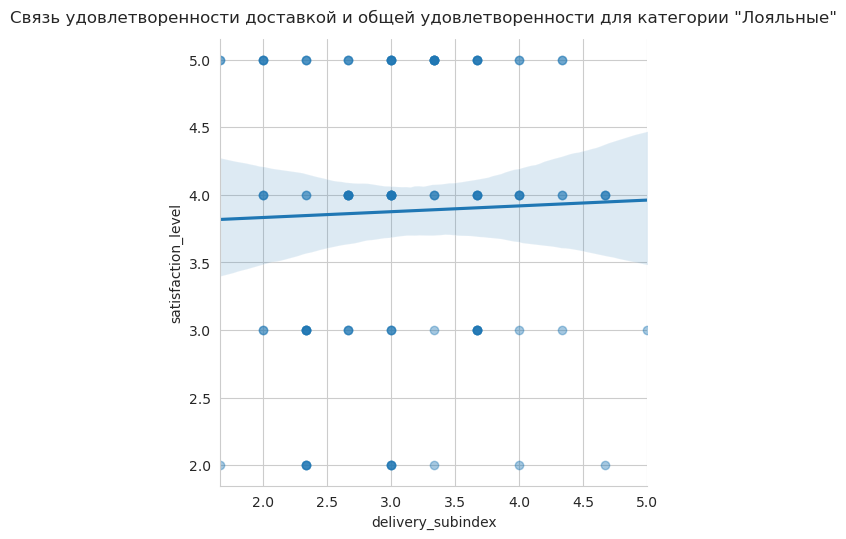

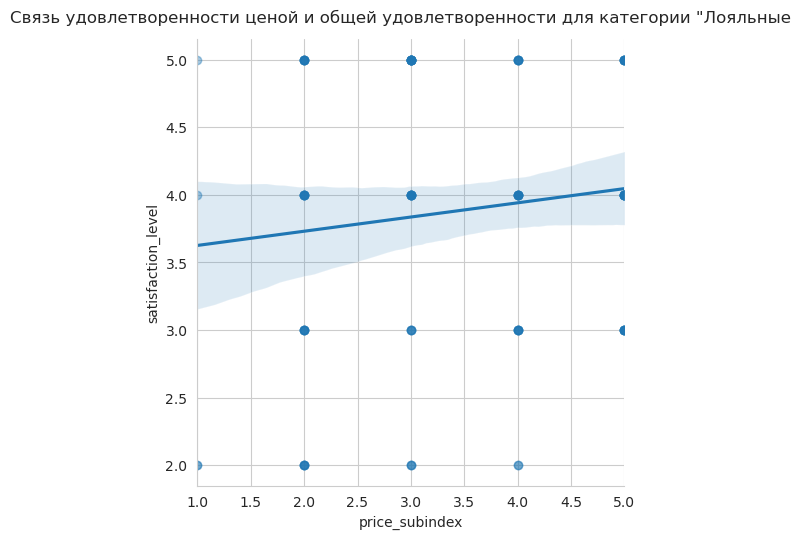

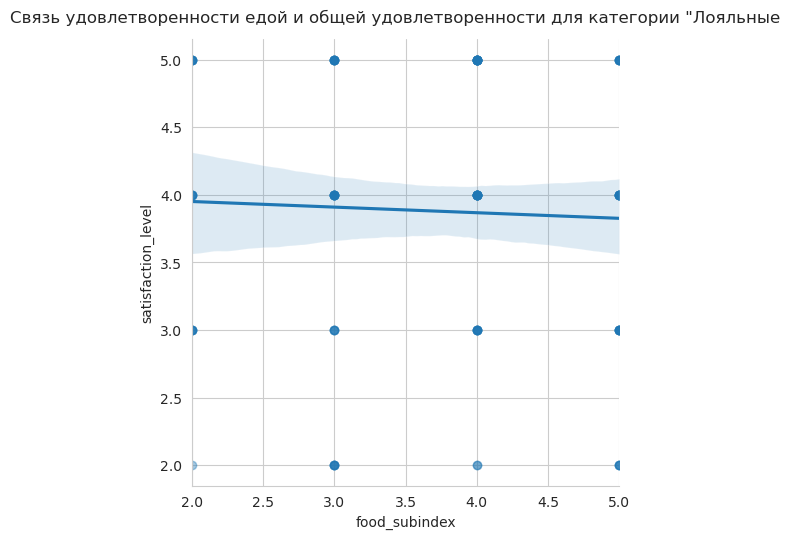

In [37]:
subset_loyal = delivery_merged[delivery_merged['client_category'] == 'loyal']

sns.lmplot(
    data=subset_loyal,
    x='delivery_subindex',      
    y='satisfaction_level',                
    scatter_kws={'alpha': 0.4} 
)
plt.suptitle('Связь удовлетворенности доставкой и общей удовлетворенности для категории "Лояльные"', y=1.03)
plt.show()

sns.lmplot(
    data=subset_loyal,
    x='price_subindex',      
    y='satisfaction_level',                
    scatter_kws={'alpha': 0.4} 
)
plt.suptitle('Связь удовлетворенности ценой и общей удовлетворенности для категории "Лояльные', y=1.03)
plt.show()

sns.lmplot(
    data=subset_loyal,
    x='food_subindex',      
    y='satisfaction_level',                
    scatter_kws={'alpha': 0.4} 
)
plt.suptitle('Связь удовлетворенности едой и общей удовлетворенности для категории "Лояльные', y=1.03)
plt.show()

**Ключевая находка: неотображаемые в данных драйверы лояльности**

Ни один из традиционно измеряемых факторов не показал значимой связи с удовлетворенностью:
- price_subindex: r=0.086, p=0.376
- food_subindex: r=-0.050, p=0.606
- delivery_subindex: r=0.044, p=0.651

**Следующие шаги:** подробный план качественного исследования см. в [разделе 4](#план-дальнейшего-исследования)

---

## ПЛАН ДАЛЬНЕЙШЕГО ИССЛЕДОВАНИЯ

### Цель
Выявить истинные драйверы удовлетворенности клиентов сегмента "Лояльные"

**Исследование данной категории является наиболее важным, т.к.**

а) это клиенты, принесшие компании наибольшую прибыль;

б) это единственная группа клиентов, для которой не выявлено не только ни одного значимого драйвера удовлетворенности, но даже какого-либо "сигнала", указывающего в его направлении;

### Гипотезы для проверки

**Гипотеза 1: "удобство интерфейса мобильного приложения (привычный интерфейс)"**
- Лояльные клиенты ценят скорость и привычность процесса заказа
- Методы проверки: анализ времени оформления заказа, доли "беспроблемных" заказов, использования функций "повторить заказ"/"избранное"

**Гипотеза 2: "отсутствие негативного опыта (надежность)"**
- Важна стабильность времени доставки, а не его абсолютное значение
- Метод проверки: анализ стандартного отклонения времени доставки по клиентам

**Гипотеза 3: "интеграция в образ жизни"**
- Сервис интегрирован в образ жизни (традиции, ритуалы)
- Метод проверки: качественное исследование (интервью), расчет доли заказов, приходящихся на "любимые продукты"

### Предлагаемые методы

#### 1. Количественное исследование (расширенные метрики)

**Что анализировать:**
- Среднее время от открытия приложения до оформления заказа
- Частота использования функций быстрого заказа
- Вариативность времени доставки (SD)
- Частота обращений в поддержку
- Паттерны повторных заказов (те же блюда, то же время)

**Ожидаемый результат:** Количественное подтверждение гипотез 1 и 2

#### 2. Качественное исследование (глубинные интервью)

**Формат:** Полуструктурированное интервью, 45-60 минут, онлайн

**Выборка:** 
- 8-10 респондентов из сегмента "Лояльные"
- Критерии отбора: 7+ заказов, последний заказ не более 2 недель назад, средняя оценка satisfaction_level ≥4

**Каналы отбора респондентов:** 
- Email-рассылка клиентам данной категории;
- пуш-уведомдение в приложении клиентам данной категории;

**Ключевые исследовательские вопросы:**

*Блок 1: Контекст использования*
- В каких ситуациях вы обычно заказываете через наше приложение?
- Расскажите о последнем заказе: что это была за ситуация?

*Блок 2: Мотивация выбора*
- Почему именно наш сервис? Рассматривали ли альтернативы?
- Что было бы, если бы сервис завтра закрылся? Чего бы не хватало?
- Бывало ли, что в момент совершения заказа вы рассматривали другое приложение для доставки, но останавливались на нашем? Почему?
или
- Сравните наше приложение с *конкурент*? Чем мы для вас отличаемся?

*Блок 3: Проверка количественных результатов*
- Насколько для вас важна цена? Качество еды? Скорость доставки?
- Что на самом деле влияет на вашу оценку после заказа?

*Блок 4: Выявление латентных факторов*
- Опишите идеальный опыт заказа через наше приложение
- Что делает наш сервис частью вашей жизни?

**Анализ:** тематический анализ интервью - выявление повторяющихся паттернов и инсайтов


#### 3. UX-тестирование

**Также может быть проведено UX-исследование, например, в формате юзабилити-тестирования с последующим интервью:**

- просим клиента из группы "Лояльные" выполнить типичную задачу в нашем приложении, комментируя действия вслух;

**Таким образом мы можем проверить гипотезу "удобство интерфейса мобильного приложения (привычный интерфейс)"**

- клиент может быстро и не задумываясь нажимать на кнопки, использовать функцию "повторный заказ";

- клиент может использовать одну неочевидную удобную для него фичу;


### Ожидаемые практические результаты

1. **Для продуктовой команды:** приоритизация функций для удержания лояльных клиентов
2. **Для маркетинга:** разработка программы лояльности на основе истинных ценностей сегмента
3. **Для аналитики:** новые метрики для мониторинга удовлетворенности лояльных клиентов

---

## ОГРАНИЧЕНИЯ ИССЛЕДОВАНИЯ

1. **Характер данных**
   - Это учебный датасет из открытых источников
   - Неизвестна методология сбора данных и репрезентативность выборки
   - Отсутствуют временные метки, что не позволяет проанализировать динамику


2. **Недостаток контекстной информации**
   - Нет данных о промо-акциях, сезонности, конкурентном окружении
   - Отсутствуют данные о повторных заказах и истории взаимодействия клиентов
   - Нет информации о причинах выставления той или иной оценки


3. **Малый размер сегментов**
   - Сегмент "лояльные клиенты" составляет всего 108 наблюдений
   - Это снижает статистическую мощность тестов для данной группы

### В контексте практического применения полученных результатов:

- Результаты исследования следует рассматривать как **гипотезы**, требующие дальнейшей проверки
- Перед принятием бизнес-решений необходимо провести дополнительные исследования (качественные и количественные)
- Данный проект демонстрирует **методологический подход** к анализу удовлетворенности, но не готовые рекомендации для бизнеса

### Перспективы улучшения и доработки проекта:

1. Применение регрессионного анализа для определения оптимальных весов субиндексов
2. Использование более сложных методов сегментации клиентской базы
3. Проведение качественного исследования (интервью) с лояльными клиентами
4. Применение поправок на множественное тестирование для повышения надежности выводов

---

## ПРИЛОЖЕНИЯ

### Приложение А: Методология

#### Обоснование выбора коэффициента корреляции Спирмена

**Проверка распределений:**

*Переменная: overall_satisfaction_index*


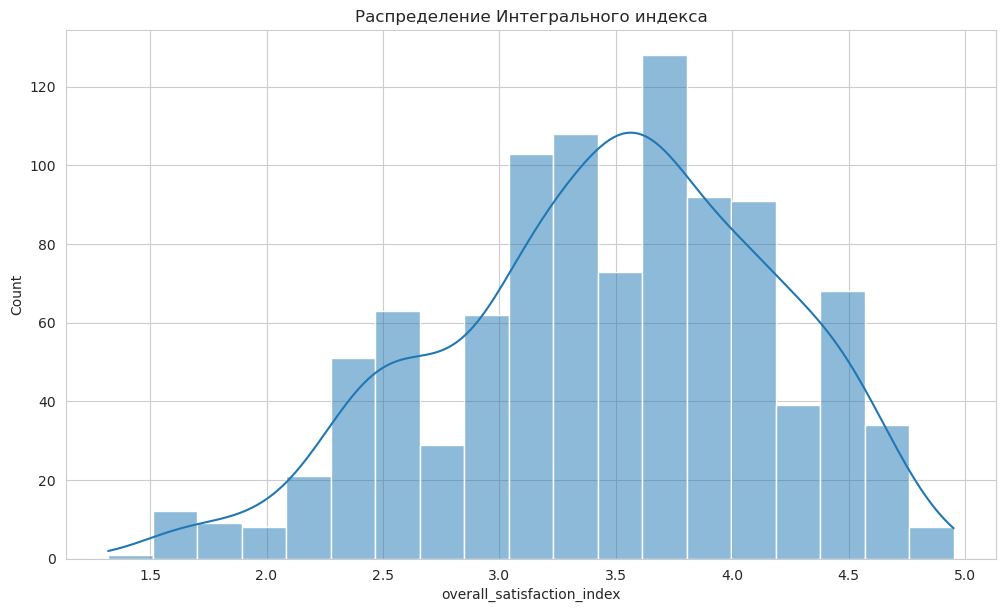

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))

plt.subplot
sns.histplot(delivery_df['overall_satisfaction_index'], kde=True)
plt.title('Распределение Интегрального индекса');

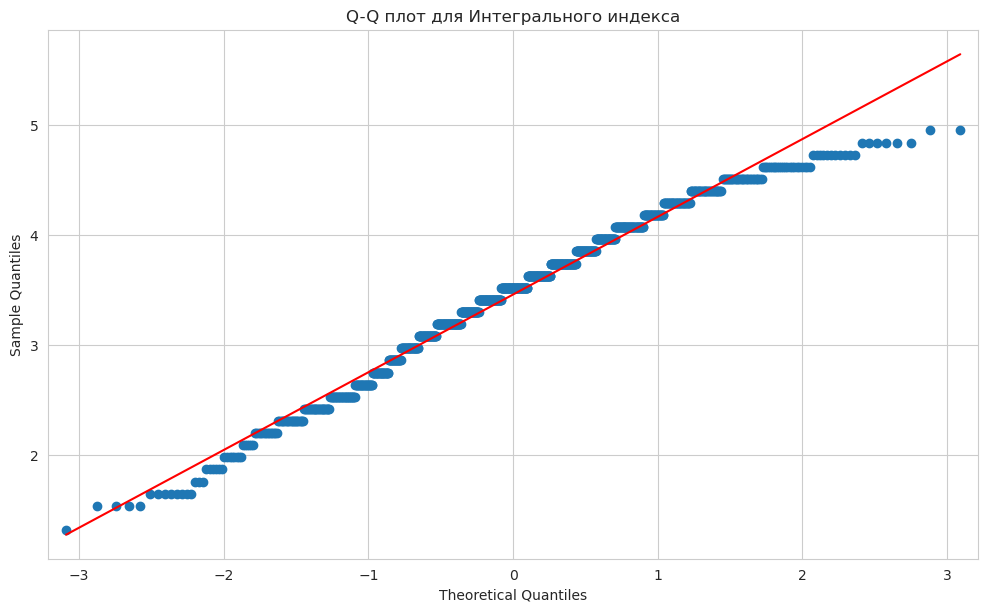

In [44]:
import statsmodels.api as sm

plt.figure(figsize=(12, 7))

plt.subplot
sm.qqplot(delivery_df['overall_satisfaction_index'], line='s', ax=plt.gca())
plt.title('Q-Q плот для Интегрального индекса');

Тест Шапиро-Уилка: W=0.983, p<0.001


**Вывод:** распределение отличается от нормального

*Переменная: satisfaction_level*

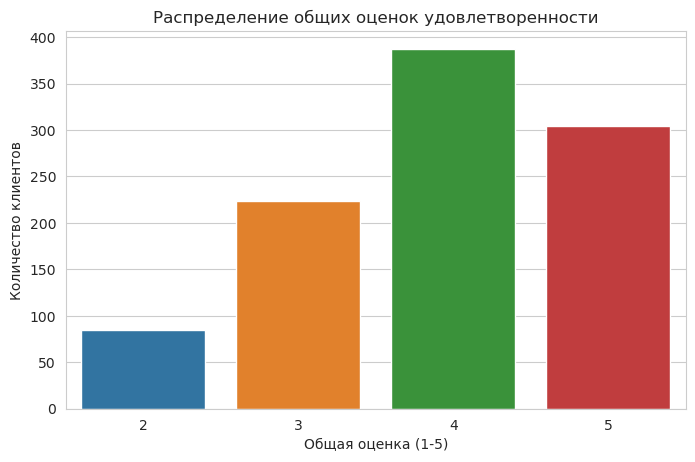

In [47]:
plt.figure(figsize=(8, 5))

sns.countplot(x='satisfaction_level', data=delivery_df)

plt.title('Распределение общих оценок удовлетворенности')
plt.xlabel('Общая оценка (1-5)')
plt.ylabel('Количество клиентов')
plt.show()

**Вывод:** дискретная переменная, не имеет нормального распределения

**Итоговое решение:** использование непараметрического метода (корреляция Спирмена) обосновано характером данных.


#### Проблема множественного тестирования

Всего проведено 15 корреляционных тестов:
- 3 теста на общей выборке (субиндексы)
- 3 теста × 3 сегмента = 9 тестов на сегментах
- 3 теста для интегрального индекса

При уровне значимости α=0.05 вероятность хотя бы одной ложноположительной находки ≈ 54%

**Поправка Бонферрони:** α_adjusted = 0.05/15 ≈ 0.003

При применении поправки значимыми остаются:
- price_subindex для всей выборки (p<0.001)
- price_subindex для активных клиентов (p<0.001)

**Примечание:** В данном исследовании поправка не применялась, так как цель — выявление потенциальных драйверов для дальнейшей валидации, а не окончательные выводы.

### Приложение Б: Технические детали

#### Код загрузки и предобработки данных

In [50]:
import pandas as pd
delivery_df=pd.read_csv("delivery_satisfaction_data.csv")

In [51]:
print(delivery_df.head())
print(delivery_df.shape)
print(delivery_df.info())

   delivery_time_min  food_quality  delivery_speed_rating  \
0                 44             5                      3   
1                 38             5                      4   
2                 46             4                      4   
3                 55             3                      1   
4                 37             5                      2   

   packaging_quality_rating  courier_politeness_rating  satisfaction_level  \
0                         3                          1                   5   
1                         4                          5                   2   
2                         3                          2                   4   
3                         4                          4                   3   
4                         2                          3                   4   

   price_satisfaction  delivery_person_ID  Restaurant_latitude  \
0                   4                 117            55.706858   
1                   4           

#### Код создания интегрального индекса

In [52]:
delivery_df['delivery_subindex']=delivery_df[['delivery_speed_rating', 'packaging_quality_rating', 'courier_politeness_rating']].mean(axis=1)
delivery_df['price_subindex']=delivery_df['price_satisfaction']
delivery_df['food_subindex']=delivery_df['food_quality']

delivery_df['overall_satisfaction_index']=(delivery_df['food_subindex']*0.33+delivery_df['delivery_subindex']*0.33+delivery_df['price_subindex']*0.33)
delivery_df['overall_satisfaction_index']

0      3.74
1      4.40
2      3.63
3      2.97
4      3.74
       ... 
995    3.30
996    3.85
997    3.30
998    3.08
999    3.19
Name: overall_satisfaction_index, Length: 1000, dtype: float64

#### Код сегментации клиентов

In [54]:
orders_per_user_df = delivery_df.groupby('delivery_person_ID').size().reset_index(name='order_count')
print(orders_per_user_df)

     delivery_person_ID  order_count
0                     1            2
1                     2            4
2                     3            2
3                     4            1
4                     6            3
..                  ...          ...
290                 296            1
291                 297            5
292                 298            3
293                 299            3
294                 300            5

[295 rows x 2 columns]


In [55]:
max_orders=orders_per_user_df['order_count'].max()
print(f'Максимальное количество заказов равно {max_orders}')

Максимальное количество заказов равно 9


In [56]:
delivery_merged = pd.merge(delivery_df, orders_per_user_df, on='delivery_person_ID', how='left')
print(delivery_merged)

     delivery_time_min  food_quality  delivery_speed_rating  \
0                   44             5                      3   
1                   38             5                      4   
2                   46             4                      4   
3                   55             3                      1   
4                   37             5                      2   
..                 ...           ...                    ...   
995                 37             4                      3   
996                 57             5                      2   
997                 46             4                      1   
998                 34             5                      1   
999                 45             5                      1   

     packaging_quality_rating  courier_politeness_rating  satisfaction_level  \
0                           3                          1                   5   
1                           4                          5                   2   
2  

In [57]:
delivery_filtered_new=delivery_merged[delivery_merged['order_count'] <= 3]
delivery_filtered_new

,delivery_time_min,food_quality,delivery_speed_rating,packaging_quality_rating,courier_politeness_rating,satisfaction_level,price_satisfaction,delivery_person_ID,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,order_price,delivery_subindex,price_subindex,food_subindex,overall_satisfaction_index,order_count
0,44,5,3,3,1,5,4,117,55.706858,37.757640,55.708540,37.751251,1470.529899,2.333333,4,5,3.74,2
3,55,3,1,4,4,3,3,28,55.715939,37.728257,55.713865,37.728104,891.066112,3.000000,3,3,2.97,2
4,37,5,2,2,3,4,4,1,55.726075,37.415079,55.717051,37.428068,1331.031279,2.333333,4,5,3.74,2
6,55,5,5,4,2,5,5,56,55.601759,37.616920,55.597270,37.601016,905.111647,3.666667,5,5,4.51,2
7,47,4,1,1,3,5,3,35,55.623553,37.459240,55.615028,37.441701,948.563444,1.666667,3,4,2.86,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,55,4,4,5,1,5,4,18,55.722678,37.436415,55.740529,37.432490,858.781918,3.333333,4,4,3.74,3
987,48,5,4,4,5,2,2,10,55.798591,37.659284,55.807925,37.662312,1402.013789,4.333333,2,5,3.74,2
991,19,4,2,5,5,4,5,195,55.656590,37.426837,55.640866,37.411030,1138.208006,4.000000,5,4,4.29,3
993,33,5,2,5,5,3,5,287,55.758575,37.708813,55.766459,37.701203,770.323025,4.000000,5,5,4.62,3


In [58]:
delivery_filtered_active=delivery_merged[(delivery_merged['order_count']>3) & (delivery_merged['order_count']<7)]
delivery_filtered_active

,delivery_time_min,food_quality,delivery_speed_rating,packaging_quality_rating,courier_politeness_rating,satisfaction_level,price_satisfaction,delivery_person_ID,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,order_price,delivery_subindex,price_subindex,food_subindex,overall_satisfaction_index,order_count
1,38,5,4,4,5,2,4,164,55.809104,37.767948,55.825865,37.772782,840.479761,4.333333,4,5,4.40,4
2,46,4,4,3,2,4,4,288,55.768035,37.422063,55.784031,37.437702,1066.118685,3.000000,4,4,3.63,4
5,37,2,5,5,3,3,2,188,55.768633,37.546868,55.764360,37.542954,1238.273694,4.333333,2,2,2.75,6
12,42,4,5,5,1,5,5,80,55.681205,37.685755,55.668118,37.695468,696.359643,3.666667,5,4,4.18,4
13,20,3,1,3,1,4,1,83,55.711147,37.766657,55.704928,37.748691,1410.021995,1.666667,1,3,1.87,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,29,4,3,4,2,5,4,93,55.843181,37.731285,55.846654,37.750137,1117.593921,3.000000,4,4,3.63,6
995,37,4,3,4,2,2,3,145,55.820656,37.468212,55.833967,37.452927,829.941938,3.000000,3,4,3.30,4
996,57,5,2,5,1,5,4,86,55.799137,37.758968,55.782028,37.777298,1367.434438,2.666667,4,5,3.85,5
997,46,4,1,2,3,4,4,153,55.634016,37.662458,55.641644,37.646099,576.218432,2.000000,4,4,3.30,5


In [59]:
delivery_filtered_loyal=delivery_merged[delivery_merged['order_count']>=7]
delivery_filtered_loyal

,delivery_time_min,food_quality,delivery_speed_rating,packaging_quality_rating,courier_politeness_rating,satisfaction_level,price_satisfaction,delivery_person_ID,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,order_price,delivery_subindex,price_subindex,food_subindex,overall_satisfaction_index,order_count
9,45,3,3,2,1,4,2,286,55.623364,37.403342,55.637806,37.398548,816.662620,2.000000,2,3,2.31,8
20,54,4,5,5,5,3,4,181,55.723091,37.670052,55.721904,37.682220,1164.303457,5.000000,4,4,4.29,7
25,41,5,5,4,4,5,5,181,55.736188,37.476807,55.750082,37.477215,1048.488809,4.333333,5,5,4.73,7
30,33,5,5,1,3,2,2,100,55.681695,37.796089,55.683408,37.791109,1201.226793,3.000000,2,5,3.30,7
32,39,4,5,4,1,5,5,103,55.675599,37.404712,55.669510,37.398437,671.233716,3.333333,5,4,4.07,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,39,4,1,5,5,4,3,26,55.750059,37.714940,55.763848,37.697105,1504.794294,3.666667,3,4,3.52,7
970,41,4,3,3,1,4,5,103,55.810388,37.529558,55.808022,37.526672,651.331645,2.333333,5,4,3.74,7
978,24,2,2,5,2,3,2,92,55.896765,37.663662,55.895527,37.674353,941.309779,3.000000,2,2,2.31,7
979,47,4,2,1,5,4,4,286,55.650049,37.559222,55.643414,37.575437,1025.862512,2.666667,4,4,3.52,8
